In [1]:
import pandas as pd
import pandas.io.sql as psql
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
connection = psycopg2.connect(user="postgres",password="funfair",host="localhost",port="5432",database="foo")


In [3]:
orders_df = pd.read_sql('SELECT * from "orders_dataset"',connection)

In [4]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
orders_df['month_year'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('M')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [6]:
orders_per_month=orders_df.groupby('month_year').order_id.count().reset_index()

In [7]:
orders_per_month

,month_year,order_id
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [8]:
a = pd.read_sql('SELECT customer_zip_code_prefix, order_purchase_timestamp, order_delivered_customer_date,payment_type,payment_installments,payment_value FROM customers_dataset INNER JOIN orders_dataset ON customers_dataset.customer_id = orders_dataset.customer_id INNER JOIN order_payments_dataset ON orders_dataset.order_id=order_payments_dataset.order_id',connection)


In [9]:
a.head()

,customer_zip_code_prefix,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value
0,39801,2018-04-25 22:01:49,2018-05-09 17:36:51,credit_card,8,99.33
1,15200,2017-06-05 10:45:54,2017-06-23 12:18:32,credit_card,3,51.84
2,29300,2018-03-22 09:46:07,2018-04-26 16:38:53,credit_card,10,157.45
3,9950,2018-01-29 14:50:01,2018-02-01 15:43:08,credit_card,4,244.15
4,8771,2017-11-13 21:37:15,2017-11-16 19:25:51,credit_card,1,132.51


In [10]:
a['time']=a.order_delivered_customer_date - a.order_purchase_timestamp

In [11]:
a.head()

,customer_zip_code_prefix,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,time
0,39801,2018-04-25 22:01:49,2018-05-09 17:36:51,credit_card,8,99.33,13 days 19:35:02
1,15200,2017-06-05 10:45:54,2017-06-23 12:18:32,credit_card,3,51.84,18 days 01:32:38
2,29300,2018-03-22 09:46:07,2018-04-26 16:38:53,credit_card,10,157.45,35 days 06:52:46
3,9950,2018-01-29 14:50:01,2018-02-01 15:43:08,credit_card,4,244.15,3 days 00:53:07
4,8771,2017-11-13 21:37:15,2017-11-16 19:25:51,credit_card,1,132.51,2 days 21:48:36


In [12]:
a['del_days'] = pd.to_numeric(a['time'].dt.days, downcast='integer')

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_zip_code_prefix       103886 non-null  int64          
 1   order_purchase_timestamp       103886 non-null  datetime64[ns] 
 2   order_delivered_customer_date  100754 non-null  datetime64[ns] 
 3   payment_type                   103886 non-null  object         
 4   payment_installments           103886 non-null  int64          
 5   payment_value                  103886 non-null  float64        
 6   time                           100754 non-null  timedelta64[ns]
 7   del_days                       100754 non-null  float64        
dtypes: datetime64[ns](2), float64(2), int64(2), object(1), timedelta64[ns](1)
memory usage: 6.3+ MB


In [14]:
a.head()

,customer_zip_code_prefix,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,time,del_days
0,39801,2018-04-25 22:01:49,2018-05-09 17:36:51,credit_card,8,99.33,13 days 19:35:02,13.0
1,15200,2017-06-05 10:45:54,2017-06-23 12:18:32,credit_card,3,51.84,18 days 01:32:38,18.0
2,29300,2018-03-22 09:46:07,2018-04-26 16:38:53,credit_card,10,157.45,35 days 06:52:46,35.0
3,9950,2018-01-29 14:50:01,2018-02-01 15:43:08,credit_card,4,244.15,3 days 00:53:07,3.0
4,8771,2017-11-13 21:37:15,2017-11-16 19:25:51,credit_card,1,132.51,2 days 21:48:36,2.0


In [15]:
a.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [16]:
a["payment_type"].replace({"credit_card": 1, "boleto": 2,"voucher": 3, "debit_card": 4,"not_defined": 5}, inplace=True)

In [17]:
a.head()

,customer_zip_code_prefix,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,time,del_days
0,39801,2018-04-25 22:01:49,2018-05-09 17:36:51,1,8,99.33,13 days 19:35:02,13.0
1,15200,2017-06-05 10:45:54,2017-06-23 12:18:32,1,3,51.84,18 days 01:32:38,18.0
2,29300,2018-03-22 09:46:07,2018-04-26 16:38:53,1,10,157.45,35 days 06:52:46,35.0
3,9950,2018-01-29 14:50:01,2018-02-01 15:43:08,1,4,244.15,3 days 00:53:07,3.0
4,8771,2017-11-13 21:37:15,2017-11-16 19:25:51,1,1,132.51,2 days 21:48:36,2.0


In [18]:
b=a.drop(['order_delivered_customer_date'], axis=1)

In [19]:
b=b.drop(['time'], axis=1)

In [20]:
b.head()

,customer_zip_code_prefix,order_purchase_timestamp,payment_type,payment_installments,payment_value,del_days
0,39801,2018-04-25 22:01:49,1,8,99.33,13.0
1,15200,2017-06-05 10:45:54,1,3,51.84,18.0
2,29300,2018-03-22 09:46:07,1,10,157.45,35.0
3,9950,2018-01-29 14:50:01,1,4,244.15,3.0
4,8771,2017-11-13 21:37:15,1,1,132.51,2.0


In [21]:
b['order_year'] = b['order_purchase_timestamp'].dt.year
b['order_month'] = b['order_purchase_timestamp'].dt.month

In [22]:
b.head()

,customer_zip_code_prefix,order_purchase_timestamp,payment_type,payment_installments,payment_value,del_days,order_year,order_month
0,39801,2018-04-25 22:01:49,1,8,99.33,13.0,2018,4
1,15200,2017-06-05 10:45:54,1,3,51.84,18.0,2017,6
2,29300,2018-03-22 09:46:07,1,10,157.45,35.0,2018,3
3,9950,2018-01-29 14:50:01,1,4,244.15,3.0,2018,1
4,8771,2017-11-13 21:37:15,1,1,132.51,2.0,2017,11


In [23]:
b['order_weekday'] = b['order_purchase_timestamp'].dt.weekday

In [24]:
b.head()

,customer_zip_code_prefix,order_purchase_timestamp,payment_type,payment_installments,payment_value,del_days,order_year,order_month,order_weekday
0,39801,2018-04-25 22:01:49,1,8,99.33,13.0,2018,4,2
1,15200,2017-06-05 10:45:54,1,3,51.84,18.0,2017,6,0
2,29300,2018-03-22 09:46:07,1,10,157.45,35.0,2018,3,3
3,9950,2018-01-29 14:50:01,1,4,244.15,3.0,2018,1,0
4,8771,2017-11-13 21:37:15,1,1,132.51,2.0,2017,11,0


In [25]:
c=b.drop(['order_purchase_timestamp'], axis=1)

In [26]:
c.head()

,customer_zip_code_prefix,payment_type,payment_installments,payment_value,del_days,order_year,order_month,order_weekday
0,39801,1,8,99.33,13.0,2018,4,2
1,15200,1,3,51.84,18.0,2017,6,0
2,29300,1,10,157.45,35.0,2018,3,3
3,9950,1,4,244.15,3.0,2018,1,0
4,8771,1,1,132.51,2.0,2017,11,0


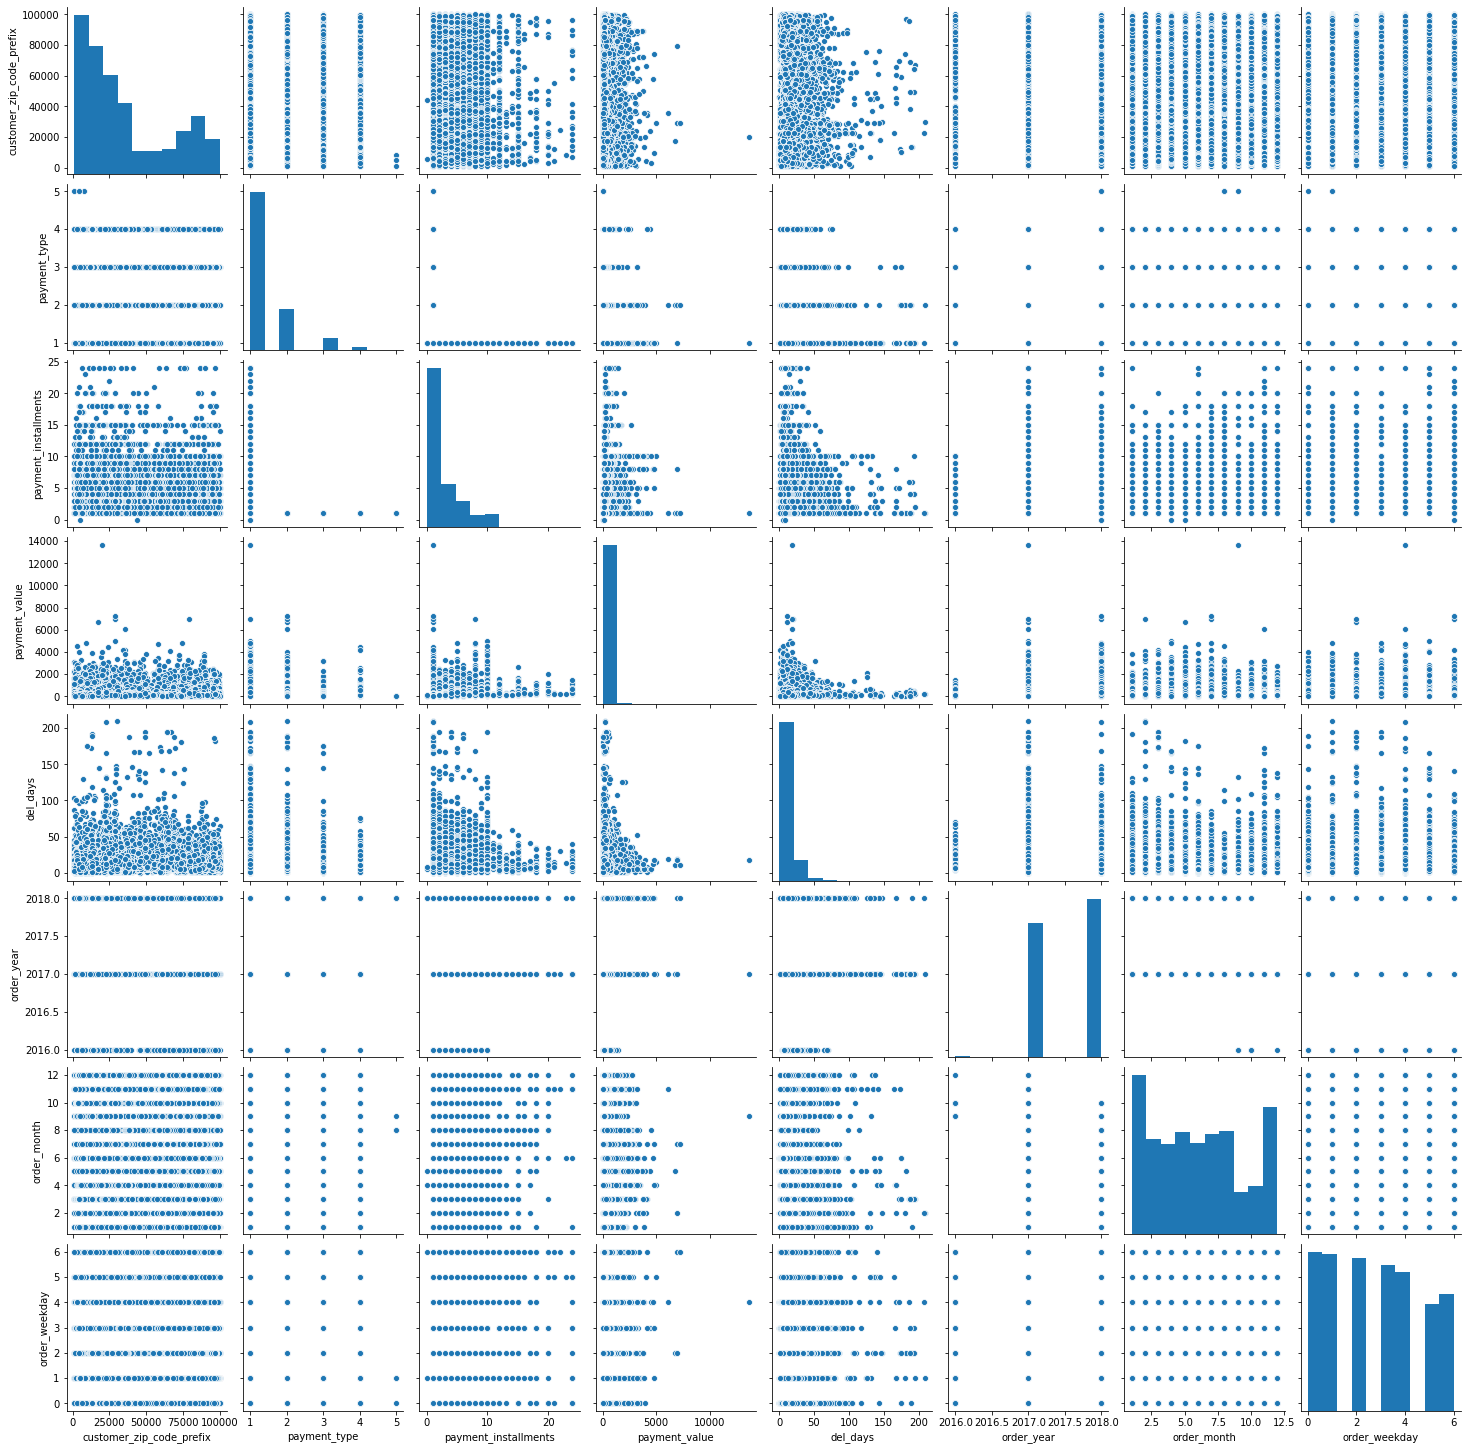

In [27]:
sns.pairplot(c)

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    c.drop(labels=['payment_value'], axis=1),
    c['payment_value'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((72720, 7), (31166, 7))

In [30]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

NameError: name 'model' is not defined

<AxesSubplot:>

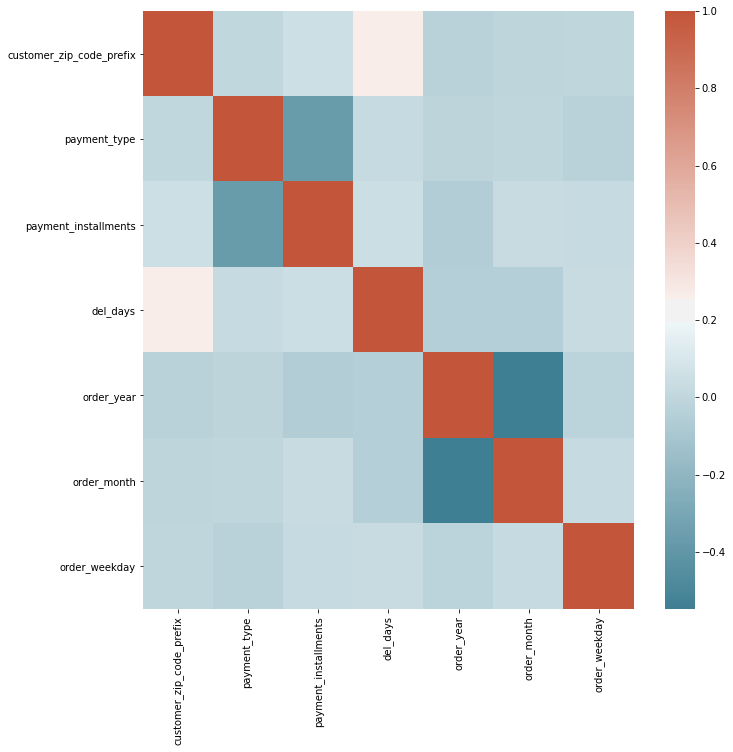

In [31]:
# visualise correlated features:

# I will build a correlation matrix, which examines the 
# correlation of all features (that is, for all possible feature combinations)
# and then visualise the correlation matrix using a heatmap

# the default correlation method of pandas.corr is pearson
# I include it anyways for the demo
corrmat = X_train.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more parameters for the figure
fig, ax = plt.subplots()
fig.set_size_inches(11,11)

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

In [32]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[i]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [33]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [35]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [36]:
xgb.feature_importances_

AttributeError: module 'xgboost' has no attribute 'feature_importances_'

In [37]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[10:59:21] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:59:21] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 217.539630


In [39]:
c.head()

,customer_zip_code_prefix,payment_type,payment_installments,payment_value,del_days,order_year,order_month,order_weekday
0,39801,1,8,99.33,13.0,2018,4,2
1,15200,1,3,51.84,18.0,2017,6,0
2,29300,1,10,157.45,35.0,2018,3,3
3,9950,1,4,244.15,3.0,2018,1,0
4,8771,1,1,132.51,2.0,2017,11,0


In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
X = c.drop('payment_value',axis=1)
y = c['payment_value']
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

NameError: name 'c' is not defined